In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.fashion_mnist

In [3]:
type(mnist)

module

In [4]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [57]:
class_name = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

### data exploration

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

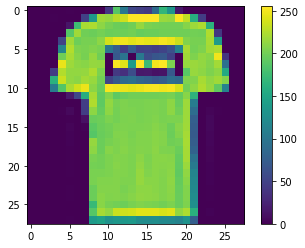

In [10]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [11]:
Y_train[1]

0

In [12]:
X_train = X_train/255.0

In [13]:
X_test = X_test/255.0

### Tensorflow Model

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [34]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))

In [35]:
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Model Compilation
*loss Function
*Optimizer
*Metrics

In [37]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(X_train,Y_train,epochs=10,batch_size = 10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 232us/sample - loss: 0.3940 - accuracy: 0.8865 - val_loss: 0.3286 - val_accuracy: 0.8845
Epoch 2/10
48000/48000 [==============================] - 10s 198us/sample - loss: 0.3091 - accuracy: 0.8968 - val_loss: 0.3197 - val_accuracy: 0.8941
Epoch 3/10
48000/48000 [==============================] - 9s 196us/sample - loss: 0.2958 - accuracy: 0.9005 - val_loss: 0.3019 - val_accuracy: 0.8985
Epoch 4/10
48000/48000 [==============================] - 9s 196us/sample - loss: 0.2821 - accuracy: 0.9034 - val_loss: 0.3590 - val_accuracy: 0.8807
Epoch 5/10
48000/48000 [==============================] - 10s 201us/sample - loss: 0.2721 - accuracy: 0.9055 - val_loss: 0.3251 - val_accuracy: 0.8930
Epoch 6/10
48000/48000 [==============================] - 9s 196us/sample - loss: 0.2655 - accuracy: 0.9084 - val_loss: 0.3176 - val_accuracy: 0.8967
Epoch 7/10
48000/48000 [=======================

In [38]:
history_2 = model.fit(X_train,Y_train,epochs=10,batch_size = 15,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 130us/sample - loss: 0.5013 - accuracy: 0.8237 - val_loss: 0.4203 - val_accuracy: 0.8433
Epoch 2/10
48000/48000 [==============================] - 6s 123us/sample - loss: 0.3744 - accuracy: 0.8645 - val_loss: 0.3586 - val_accuracy: 0.8685
Epoch 3/10
48000/48000 [==============================] - 6s 125us/sample - loss: 0.3377 - accuracy: 0.8772 - val_loss: 0.3579 - val_accuracy: 0.8721
Epoch 4/10
48000/48000 [==============================] - 6s 124us/sample - loss: 0.3127 - accuracy: 0.8832 - val_loss: 0.3403 - val_accuracy: 0.8819
Epoch 5/10
48000/48000 [==============================] - 6s 130us/sample - loss: 0.2953 - accuracy: 0.8900 - val_loss: 0.3277 - val_accuracy: 0.8845
Epoch 6/10
48000/48000 [==============================] - 7s 136us/sample - loss: 0.2797 - accuracy: 0.8959 - val_loss: 0.3275 - val_accuracy: 0.8826
Epoch 7/10
48000/48000 [==========================

In [21]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print(test_acc)
print("\n")
print(test_loss)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3459 - accuracy: 0.8797
0.8797


0.3459041990399361


### Ploting learning curve and confusion Matrix

In [49]:
y_pred = model.predict_classes(X_test)

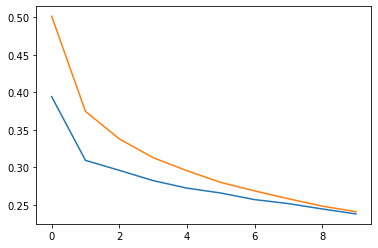

In [40]:
plt.plot(history.history['loss'])
plt.plot(history_2.history['loss'])

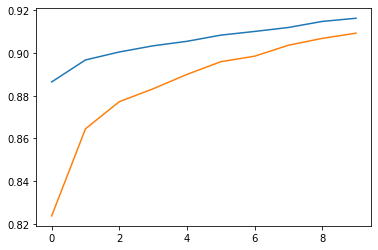

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history_2.history['accuracy'])

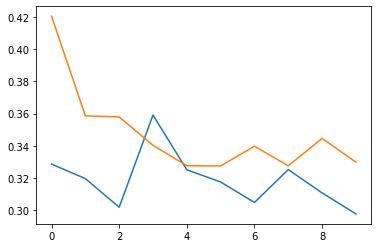

In [43]:
plt.plot(history.history['val_loss'])
plt.plot(history_2.history['val_loss'])

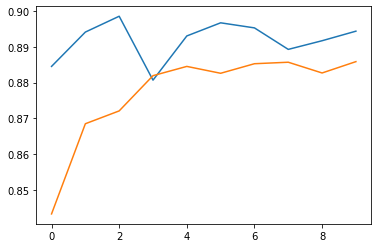

In [44]:
plt.plot(history.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])

In [45]:
!pip install mlxtend

In [46]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [53]:
mat = confusion_matrix(Y_test,y_pred)

In [54]:
mat

array([[805,   1,  26,  30,   6,   1, 129,   0,   2,   0],
       [  1, 964,   2,  25,   5,   0,   3,   0,   0,   0],
       [  8,   1, 776,  13, 125,   0,  76,   0,   1,   0],
       [ 16,   4,  12, 900,  48,   0,  17,   0,   3,   0],
       [  0,   0,  66,  27, 872,   0,  35,   0,   0,   0],
       [  0,   0,   0,   1,   0, 933,   0,  37,   1,  28],
       [100,   0,  71,  37, 106,   0, 681,   0,   5,   0],
       [  0,   0,   0,   0,   0,   5,   0, 963,   1,  31],
       [  7,   0,   7,   5,   3,   1,  11,   6, 960,   0],
       [  0,   0,   0,   0,   0,   3,   1,  37,   0, 959]], dtype=int64)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13e73a0c5c8>)

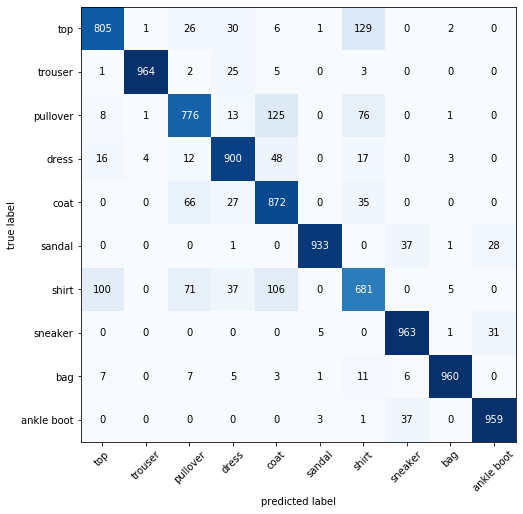

In [59]:
plot_confusion_matrix(mat,figsize=(8,8),class_names=class_name)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13e73ae4808>)

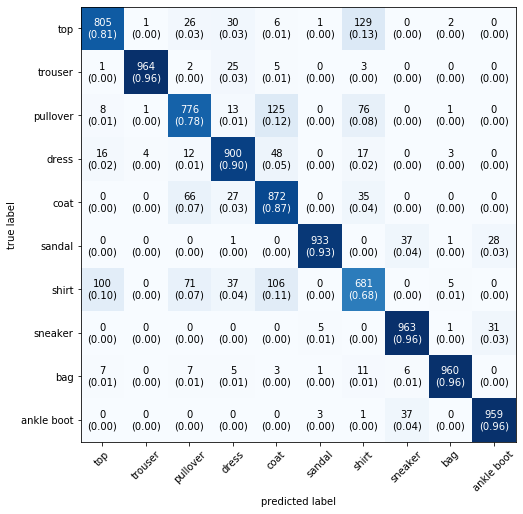

In [60]:
plot_confusion_matrix(mat,figsize=(8,8),class_names=class_name,show_normed='True')